# 대표적인 연속형 확률분포

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

#### 그래프의 선의 종류

In [5]:
linestyles = ['-', '--', ':']

#### 기댓값과 분산에 대한 함수

In [7]:
def E(X, g = lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g = lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

#### 확률변수가 확률의 성질을 만족하는지 확인하고, 기댓값과 분산을 계산

In [6]:
def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected vaue {E(X):.3f}')
    print(f'variance {V(X):.3f}')

#### 확률변수의 밀도함수와 분포함수를 그림

In [8]:
def plot_prob(X, x_min, x_max):
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize = (10, 6))
    ax = fig.add_subplot(111)
    
    ax.plot(xs, [f(x) for x in xs],
            label = 'f(x)', color = 'gray')
    ax.plot(xs, [F(x) for x in xs],
            label = 'F(x)', ls = '--', color = 'gray')

    ax.legend()
    
    plt.show()

### 
## 정규분포 (가우스 분포) : $N(\mu, \sigma^2)$

|  |  |
| -- | -- |
| **파라미터** | $\mu, \sigma^2$ |
| **취할 수 있는 값** | 실수전체 |
| **밀도함수** | $${1 \over {\sqrt{2 \pi}\sigma}} \; {exp \{- {{(x - \mu)^2} \over {2\sigma^2}} \}}$$ |
| **기댓값** | $\mu$ |
| **분산** | $\sigma^2$) |
| **scipy.stats** | $norm(\mu, \sigma)$ |

### 정규분포의 밀도함수

### $f(x) = {1 \over {\sqrt{2 \pi}\sigma}} \; {exp \{- {{(x - \mu)^2} \over {2\sigma^2}} \}} \;\;\; (-\infty \leq x \leq \infty)$

### 
#### 키의 분포
### $X \sim N(170, 5^2)$
### $P(165 \leq X \leq 175) = \int^{175}_{165} {1 \over {\sqrt{2 \pi} \times 5}} \; {exp \{- {{(x - 170)^2} \over {2\times 5^2}} \} \; dx \approx 0.683}$

#### 점수의 분포
### $X \sim N(70, 8^2)$
### $P(54 \leq X \leq 86) = \int^{86}_{54} {1 \over {\sqrt{2 \pi} \times 8}} \; {exp \{- {{(x - 70)^2} \over {2\times 8^2}} \} \; dx \approx 0.954}$

### 
### 정규분포의 기댓값과 분산
### $E(X) = \mu \;\;\;\;\;\;\; V(X) = \sigma^2$ 

### 
### 정규분포의 변환
### $X \sim N(\mu, \sigma^2)$일때 $\\ aX + b \sim N(a\mu + b, \;\; a^2 \sigma^2)$

### 
### 표준정규분포
### $Z = {{X - \mu} \over \sigma} \sim N(0, 1)$

In [9]:
def N(mu, sigma):
    x_range = [- np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma**2) *\
                    np.exp(-(x - mu)**2 / (2 * sigma**2))
    return x_range, f

In [10]:
mu, sigma = 2, 0.5
X = N(mu, sigma)

In [11]:
check_prob(X)

expected vaue 2.000
variance 0.250


#### 정규분포의 밀도함수와 분포함수
- 좌우대칭인 종 모양

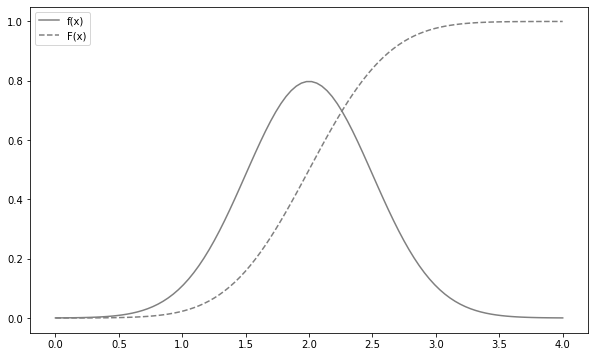

In [12]:
plot_prob(X, 0, 4)

### 
### ```stats.norm(mu, sigma)```

In [15]:
rv = stats.norm(2, 0.5)

In [16]:
rv.mean(), rv.var()

(2.000, 0.250)

#### 밀도함수

In [13]:
rv.pdf(2)

0.7978845608028654

#### 분포함수 : $P(X \leq x)$
- 밀도함수 그래프의 특정 영역

In [17]:
rv.cdf(1.7)

0.274

### 상위 100a%점 ($z_{\alpha}$)

####  표준정규분포의 상위 100a%점은 자주사용
- $z_{\alpha}$는 $Z \sim N(0, 1)$이면 => $P(Z \geq z_{\alpha}) = \alpha$를 만족
- 표준정규분포는 $x = 0$을 중심으로 대칭인 형태 =? $z_{1-\alpha} = -z_{\alpha}$

### ```.isf(a)``` : 상위 100a%점 $(P(X \geq x) = \alpha \;를 만족하는 x)$

- 상위 30%점

In [15]:
rv.isf(0.3)

2.2622002563540207

### 확률이 $\alpha$가 되는 가운데 부분의 구간 계산
### $P(a \leq X \leq b) = \alpha \;\;\;\;\; P(X \leq a) = P(X \geq b) = {{1-\alpha} \over 2}$ 

- 90%구간

In [18]:
rv.interval(0.9)

(1.178, 2.822)

- **좌, 우에 5%씩 남아 있기에, 상위 95%점과 5%점 사이와 동일**

In [19]:
rv.isf(0.95), rv.isf(0.05)

(1.178, 2.822)

#### 표준정규분포의 경우 100(1-$\alpha$)% 구간은 $z_{alpha}$를 사용하여 [$z_{1-\alpha/2}, z_{\alpha / 2}$]
- 표준정규분포의 95%구간은 $\alpha = 0.05$에 대응하는 것이므로 [$z_{0.975}, z_{0.025}$]

### 
### ```stats.norm()```

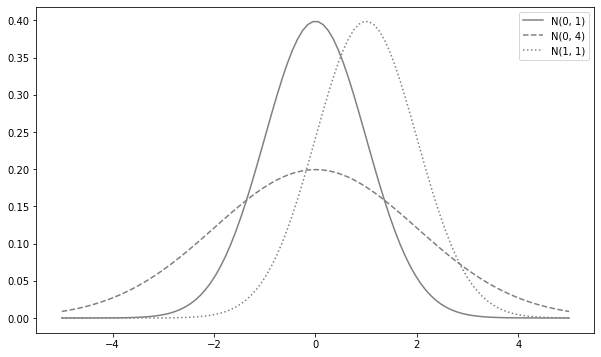

In [22]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-5, 5, 100)
params = [(0, 1), (0, 2), (1, 1)]

for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs),
            label = f'N({mu}, {sigma**2})', ls = ls, color = 'gray')

ax.legend()

plt.show()

- **$\sigma^2$가 커짐에 따라 분포가 넓어지고, $\mu$가 변화하면 분포 전체가 평행이동**

### 
## 지수분포 : $Ex(\lambda)$ : 단위시간당 평균 $\lambda$번 발생하는 사건의 발생 간격을 따르는 확률분포
#### **포아송 분포와 관련성이 높음**
- **$Poi(\lambda)$ : 단위시간당 평균 $\lambda$번 발생하는 사건에 대해, 단위시간당 사건이 발생하는 횟수가 따르는 분포**
- **$Ex(\lambda)$** : 사건의 발생 간격이 따르는 분포

|  |  |
| -- | -- |
| **파라미터** | $\lambda$ |
| **취할 수 있는 값** | 양의 실수 |
| **밀도함수** | $$\lambda \; e^{\lambda x}$$ |
| **기댓값** | $1 \over \lambda$ |
| **분산** | $1 \over {\lambda^2}$ |
| **scipy.stats** | $expon(scale = {1 \over {\lambda}})$ |

### 지수분포의 밀도함수

### $f(x) =
\begin{cases}
\lambda \; e^{\lambda x} \; if \;\; (x \geq 0)\\
0 \; if \;\; (otherwise)
\end{cases}
$

### 
#### 일 평균 2건의 사고가 발생하는 지역에서, 사고가 일어난 뒤 3일 이내에 또 사고가 발생할 확률
### $X \sim Ex(2)$
### $P(X \leq 3) = \int^{3}_{0} {2 \; e^{2 x} \; dx \approx 0.998}$

#### 시간당 평균 10번 액세스 하는 사이트에서, 1분 이내에 또 액세스가 발생할 확률
### $X \sim Ex(10)$
### $P(X \leq {1 \over 60}) = \int^{1 \over 60}_{0} {10 \; e^{10 x} \; dx \approx 0.154}$

### 
### 지수분포의 기댓값과 분산
### $E(X) = {1 \over \lambda} \;\;\;\;\;\;\; V(X) = {1 \over \lambda^2}$ 

In [23]:
def Ex(lam):
    x_range = [0, np.inf]
    def f(x):
        if x >= 0:
            return lam * np.exp(-lam * x)
        else:
            return 0
    return x_range, f

In [26]:
lam = 3
X = Ex(lam)

In [27]:
check_prob(X)

expected vaue 0.333
variance 0.111


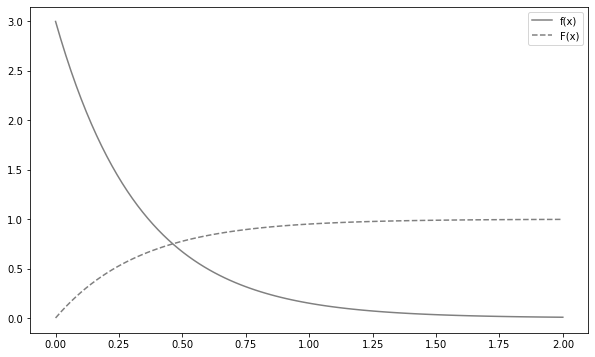

In [28]:
plot_prob(X, 0, 2)

- 지수분포의 밀도함수는 값이 커질수록 지수적으로 감소

### 
### ```stats.expon(scale = 1 /``` $\lambda $```)```

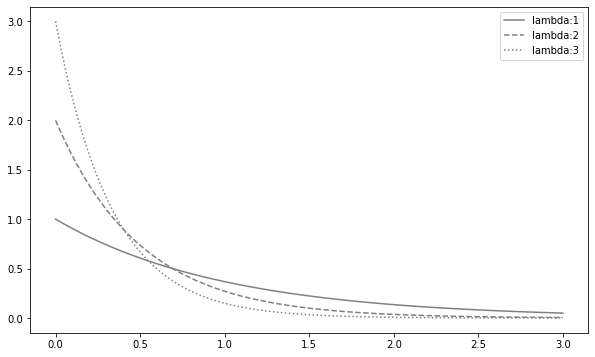

In [29]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 3, 100)
for lam, ls in zip([1, 2, 3], linestyles):
    rv = stats.expon(scale = 1 / lam)
    ax.plot(xs, rv.pdf(xs),
            label = f'lambda:{lam}', ls = ls, color = 'gray')
    
ax.legend()

plt.show()

- **값이 커짐에 따라 확률분포는 점점 감소**

### 
## 카이제곱분포 : $\chi^2{(df)}$ 
- **분산의 구간추정이나 독립성 검정에 사용**

### 
|  |  |
| -- | -- |
| **파라미터** | $n$ |
| **취할 수 있는 값** | 음수가 아닌 실수 |
| **scipy.stats** | $chi2(n)$ |

#### **서로 독립인 복수의 표준정규분포에 의해 다음과 같이 정의**

- ** $Z_1, Z_2, ..., Z_n$이 서로 독립이고 $N(0, 1)$을 따르고 있을 때, 그 제곱합**
### $Y = \sum_{i = 1}^{n} Z_i^2$ 의 확률분포를 자유도가 n인 카이제곱분포라고 함

### 
### 표준정규분포에서 표본 크기 10으로 무작위추출을 하여, 그 제곱합을 취하는 작업을 100만 번 수행
#### => $\sum_{i = 1}^{10} Z_i^2$에서 무작위추출한 표본 크기 100만의 표본 데이터 획득

In [32]:
n = 10
rv = stats.norm(0, 1)
sample_size = int(1e6)

### ```rv.rvs((n, sample_size))``` : 분포에서 n의 크기의 표본을, sample_size만큼 추출 
- **10개의 표준정규분포 제곱합이므로, 자유도가 10인 카이제곱분포가 생성**

In [42]:
Zs_sample = rv.rvs((n, sample_size))
chi2_sample = np.sum(Zs_sample**2, axis = 0)
Zs_sample.shape, chi2_sample.shape

((10, 1000000), (1000000,))

## 
### 카이제곱분포 밀도함수 시각화
### ```stats.chi2(n)```
#### $\sum_{i = 1}^{10} Z_i^2$에서 무작위추출한 표본 데이터의 히스토그램과 $\chi^2{(10)}$의 밀도함수 생성

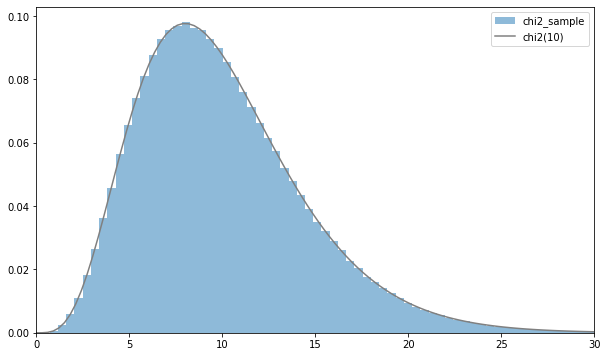

In [43]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

rv_true = stats.chi2(n)
xs = np.linspace(0, 30, 100)
ax.hist(chi2_sample, bins = 100, density = True,
        alpha = 0.5, label = 'chi2_sample')
ax.plot(xs, rv_true.pdf(xs), label = f'chi2({n})', color = 'gray')

ax.legend()

ax.set_xlim(0, 30)

plt.show()

- **히스토그램과 밀도함수가 정확하게 일치**
### 

### 자유도 n에 따라 분포 형태의 변화
- **좌우비대칭으로, 좌측으로 치우치고 우측으로 넓어짐**
- **자유도가 커지면 좌우대칭에 가까워짐**
- **자유도의 값 가까이에 분포의 정점이 위치**

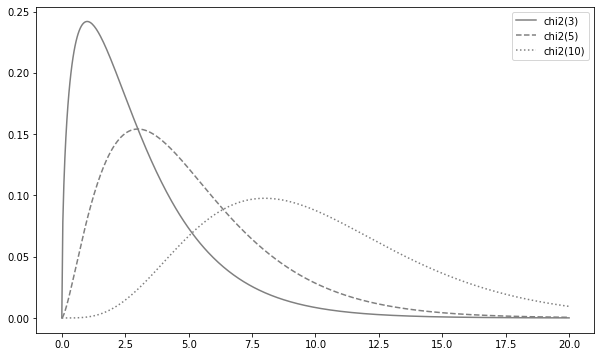

In [44]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 20, 500)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.chi2(n)
    ax.plot(xs, rv.pdf(xs),
            label = f'chi2({n})', ls = ls, color = 'gray')
    
ax.legend()

plt.show()

### 
### 자유도 n인 카이제곱분포의 상위 100a%점 : $\chi^2_{\alpha} (n)$
- $\chi^2_{0.05} (5)$

In [50]:
rv = stats.chi2(5)
rv.isf(0.05)

11.070

### 
## t분포: $t{(n)}$ 
- **정규분포에서 모평균의 구간추정 등에 사용하는 확률분포**

### 
|  |  |
| -- | -- |
| **파라미터** | $n$ |
| **취할 수 있는 값** | 실수 전체 |
| **scipy.stats** | $t(n)$ |

#### **서로 독립인 복수의 표준정규분포와 카이제곱분포에 의해 다음과 같이 정의**

- **확률변수 Z, Y는 서로 독립이고, Z는 표준정규분포 N(0, 1)을, Y는 자유도가 n인 카이제곱분포 $\chi^2 (n)$을 각각 다를 때,**
### $t = {Z \over {\sqrt{Y/n}}}$ 의 확률분포를 자유도가 n인 t 분포라고 함

### 
### $Z \sim N(0, 1)$과 $Y \sim \chi^2(10)$을 사용하여 ${Z \over {\sqrt{Y/10}}}$에서 무작위추출 시행
- **자유도가 10인 카이제곱분포를 사용했으므로, 자유도가 10인 t분포가 생성**

In [51]:
n = 10
sample_size = int(1e6)

rv1 = stats.norm(0, 1)
rv2 = stats.chi2(n)

In [52]:
Z_sample = rv1.rvs(sample_size)
chi2_sample = rv2.rvs(sample_size)
Z_sample.shape, chi2_sample.shape

((1000000,), (1000000,))

In [53]:
t_sample = Z_sample / np.sqrt(chi2_sample/n)
t_sample.shape

(1000000,)

### 
### t분포 밀도함수 시각화
### ```stats.t(n)```

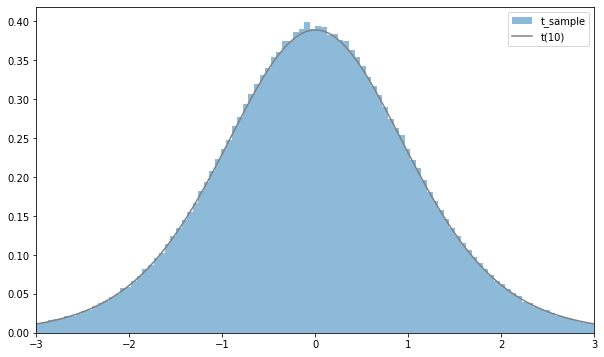

In [54]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

rv = stats.t(n)
xs = np.linspace(-3, 3, 100)
ax.hist(t_sample, bins = 100, range = (-3, 3),
        density = True, alpha = 0.5, label = 't_sample')
ax.plot(xs, rv.pdf(xs), label = f't({n})', color = 'gray')

ax.legend()

ax.set_xlim(-3, 3)

plt.show()

### 
### 자유도 n에 따라 분포 형태의 변화
- **좌우대칭**
- **표준정규분포보다 양쪽 끝이 두꺼움**
- **자유도가 커지면 표준정규분포에 근사**

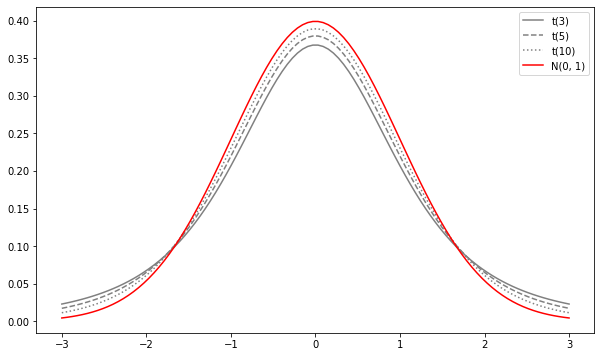

In [56]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-3, 3, 100)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.t(n)
    ax.plot(xs, rv.pdf(xs),
            label = f't({n})', ls = ls, color = 'gray')
    
rv = stats.norm(0, 1)
ax.plot(xs, rv.pdf(xs), label = 'N(0, 1)', color = 'red')
    
ax.legend()

plt.show()

### 
### 자유도 n인 t분포의 상위 100a%점 : $t{\alpha} (n)$
- $t{0.05} (5)$

In [57]:
rv = stats.t(5)
rv.isf(0.05)

2.015

### 
## F분포: $f{(n_1, n_2)}$ 
- **분산분석 등에서 사용되는 확률분포**

### 
|  |  |
| -- | -- |
| **파라미터** | $n_1, n_2$ |
| **취할 수 있는 값** | 음수가 아닌 실수 |
| **scipy.stats** | $f(n_1, n_2)$ |

#### **서로 독립인 두 개의 카이제곱분포에 의해 다음과 같이 정의**

- **확률변수 $Y_1, Y_2$는 서로 독립이고, 각각 $Y_1 \sim \chi^2(n_1), Y_2 \sim \chi^2(n_2)$를 따를 떄**
### $F = {{Y_1 / n_1} \over {Y_2 / n_2}}$ 의 확률분포를 자유도가 $n_1, n_2$인 F분포 $F(n_1, n_2)$라고 함

### 
### $Y_1 \sim \chi^2(5), Y_2 \sim \chi^2(10)$을 사용하여 ${{Y_1 / n_1} \over {Y_2 / n_2}}$에서 무작위추출 수행
- **자유도가 $n_1, n_2$인 카이제곱분포를 사용했으므로, 자유도가 $n_1, n_2$인 F분포가 생성**

In [59]:
n1 = 5
n2 = 10
sample_size = int(1e6)

rv1 = stats.chi2(n1)
rv2 = stats.chi2(n2)

In [60]:
sample1 = rv1.rvs(sample_size)
sample2 = rv2.rvs(sample_size)
sample1.shape, sample2.shape

((1000000,), (1000000,))

In [62]:
f_sample = (sample1 / n1) / (sample2 / n2)
f_sample.shape, f_sample[:10]

((1000000,),
 array([1.569, 0.819, 0.139, 1.519, 1.979, 0.34 , 0.155, 0.572, 0.766,
        1.605]))

### 
### F분포 밀도함수 시각화
### ```stats.f(n1, n2)```

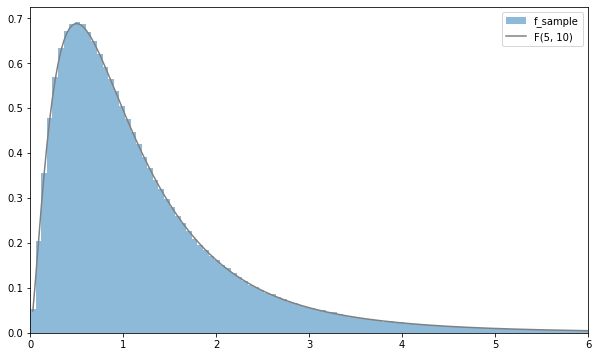

In [63]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

rv = stats.f(n1, n2)
xs = np.linspace(0, 6, 200)[1:]

ax.hist(f_sample, bins = 100, range = (0, 6),
        density=True, alpha=0.5, label='f_sample')
ax.plot(xs, rv.pdf(xs), label = f'F({n1}, {n2})', color = 'gray')

ax.legend()

ax.set_xlim(0, 6)

plt.show()

- **${{Y_1 / 5} \over {Y_2 / 10}}$**이 $F(5, 10)$이 된 것을 확인

### 
### 자유도 n에 따라 분포 형태의 변화
- **좌우비대칭으로, 좌측으로 치우치고 오른쪽으로 넓어지는 분포**
- **분포의 정점은 1에 근접**

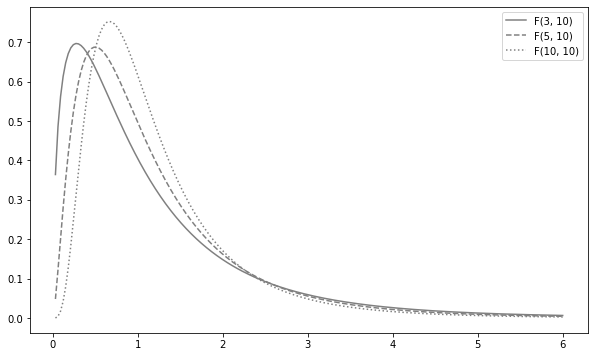

In [64]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 6, 200)[1:]
for n1, ls in zip([3, 5, 10], linestyles):
    rv = stats.f(n1, 10)
    ax.plot(xs, rv.pdf(xs),
            label = f'F({n1}, 10)', ls = ls, color = 'gray')
    
ax.legend()

plt.show()